In [5]:
from matching import get_matcher, viz2d
from pathlib import Path
import torch

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')
matcher = get_matcher('roma', mode='semi-dense', device=device)

Using device: cuda
Warning, cannot find cuda-compiled version of RoPE2D, using a slow pytorch version instead
/!\ module trimesh is not installed, cannot visualize results /!\


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


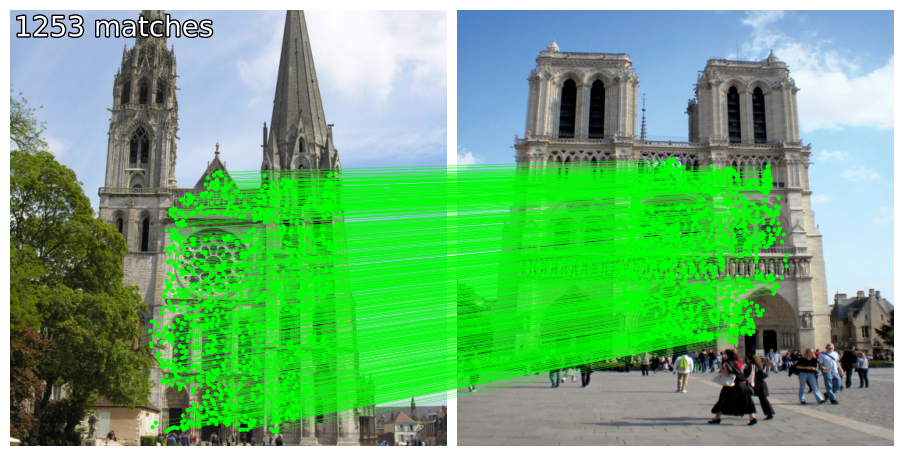

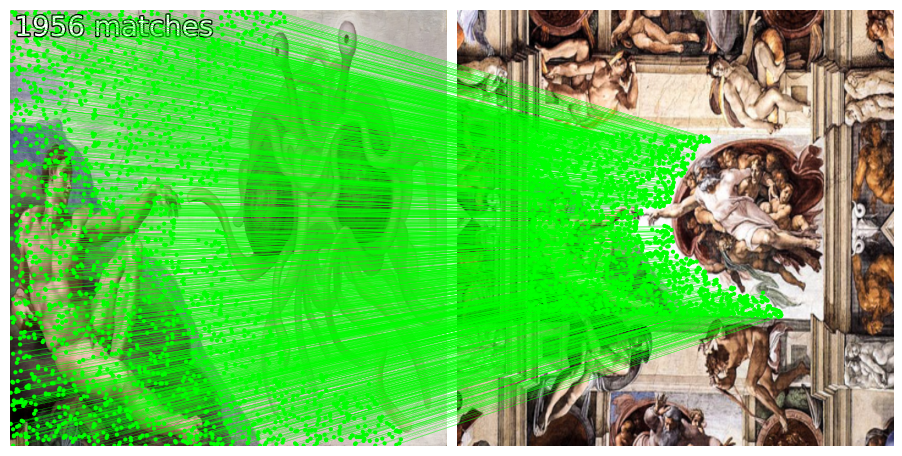

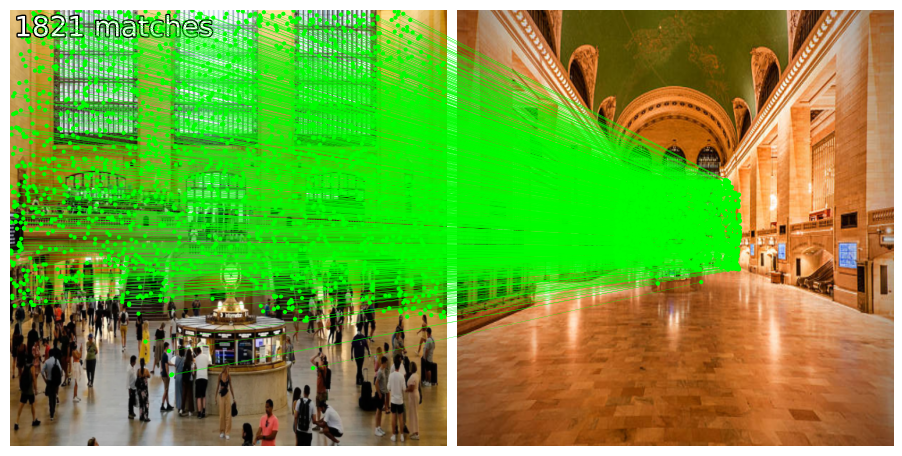

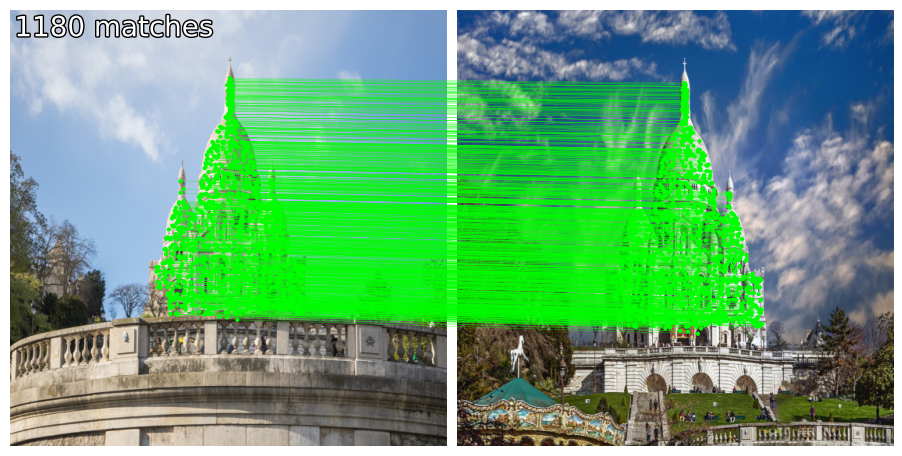

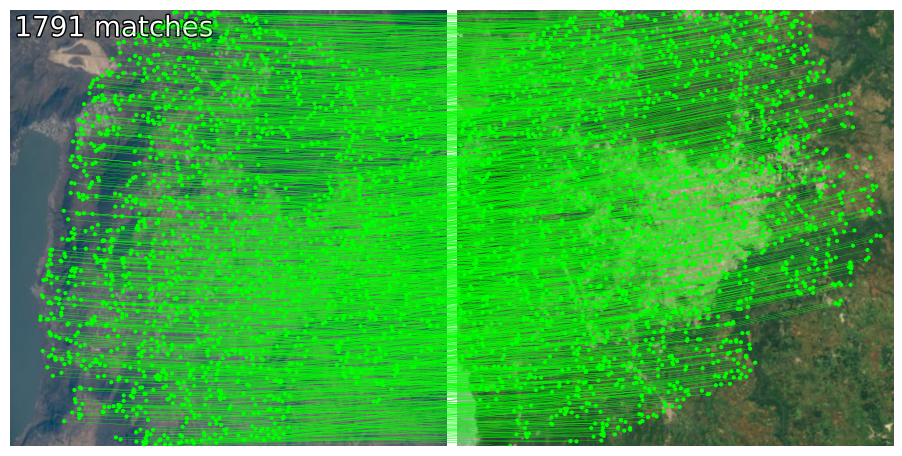

In [ ]:
asset_dir = Path('assets/example_pairs')
pairs = list(asset_dir.iterdir())
image_size = 560
for pair in pairs:
    pair = list(pair.iterdir())
    img0 = matcher.image_loader(pair[0], resize=image_size).to(device)
    img1 = matcher.image_loader(pair[1], resize=image_size).to(device)


    num_inliers, H, mkpts0, mkpts1 = matcher(img0, img1)
    axes = viz2d.plot_images([img0, img1])
    viz2d.plot_matches(mkpts0, mkpts1, color='lime', lw=0.2)
    viz2d.add_text(0, f'{len(mkpts1)} matches', fs=20)
